# CSC/XMM validation catalogs

In [65]:
import sys
sys.path.append('../')

In [66]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

import matplotlib.pyplot as plt
# plt.style.use('seaborn')

import seaborn as sns

from scripts.utils import set_mpl, data_path
from scripts.cross_match_scripts import cross_match_data_frames,  add_separation_columns
set_mpl()

%matplotlib inline
from astropy.table import Table

matplotlib settings set


***

In [67]:
ero_df = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14.pkl') 
ero_df.sample(5)

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH
5215,SRGe J104138.7+574650,160.411262,57.780564,150.506282,51.831334,8.295113,14.172951,6.553222e-15,1.679213e-15,31.041208,7.954073,4327.441406,0.0,0.0,0.0,4311,3467,160.413271,57.779275,3.612374,44.792725,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.007173,0.001838,18.418486,160.411262,57.780564,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,1,0,2,17.240999,16.848,12.366,9.4,3.7,1.1,3,2,1,1237655108372333157,0,4.886561,63491197078,3.612374,2.965559,4.476785,7.258938,135.101681,44.837446,5.042960e-15,5.981684e+19
941,SRGe J102256.8+562724,155.736585,56.456640,154.588757,50.548629,2.686665,484.755707,2.699005e-14,1.957787e-15,227.725311,16.518595,7708.236816,0.0,0.0,0.0,298,252,155.738593,56.455350,0.844261,111.597557,0.000007,6.268413e+08,6.270701e+08,0.0,0.0,0.029543,0.002143,26.567366,155.736585,56.456640,853147596393694848,5.948641,1,0,20.316483,-1.0,0,SDSS J102256.74+562723.3,1.743664,QSO,5.946340,1,0,0,1,15.716000,14.766,12.171,25.1,20.1,3.4,1,4,1,1237658303277826389,0,2.214820,68663977089,0.844261,0.960501,1.449965,2.351063,133.018428,42.405197,2.076990e-14,9.078285e+19
4386,SRGe J104633.9+564216,161.641207,56.704329,151.168532,53.030523,7.909548,23.235327,7.815640e-15,1.795971e-15,35.017307,8.046695,4093.226074,0.0,0.0,0.0,3834,3066,161.643215,56.703040,3.434792,49.150715,0.000005,6.268413e+08,6.270701e+08,0.0,0.0,0.008555,0.001966,20.195845,161.641207,56.704329,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,0,0,1,17.579000,16.334,12.562,6.9,5.7,0.4,1,1,0,1237655106761851262,0,9.408893,67682525674,3.434792,2.827717,4.268700,6.921536,136.692183,44.274692,6.014440e-15,6.444806e+19
5673,SRGe J103623.3+571807,159.097243,57.302006,151.817774,51.574950,7.214485,17.065084,6.021838e-15,1.565217e-15,28.473583,7.400951,4319.769531,0.0,0.0,0.0,7104,5988,159.099252,57.300716,3.113236,67.450073,0.000005,6.268413e+08,6.270701e+08,0.0,0.0,0.006591,0.001713,20.516573,159.097243,57.302006,854744194652932480,5.003397,1,0,19.827131,-1.0,0,LAMOST J103623.26+571805.0,1.844000,QSO,5.004206,1,0,0,1,16.910000,15.412,11.631,11.6,12.4,5.5,1,1,1,1237658303278678241,7980603501515657216,5.082532,65340360022,3.113236,2.579227,3.893582,6.313296,134.610031,44.060824,4.634039e-15,5.499519e+19
7852,SRGe J105505.7+580315,163.773587,58.054064,148.223358,52.982149,10.576872,9.424306,4.074681e-15,1.316493e-15,19.325411,6.243866,4332.939453,0.0,0.0,0.0,8227,7082,163.775595,58.052775,4.655569,172.423569,0.000010,6.268413e+08,6.270701e+08,0.0,0.0,0.004460,0.001441,17.336840,163.773587,58.054064,-1,-1.000000,0,-1,NaN,-1.0,-1,SDSS J105506.15+580317.2,2.387000,QSO,7.251476,1,0,0,0,17.660000,16.986,12.281,6.4,1.4,0.8,1,2,1,1237658303279792393,7996284186746179584,6.946282,62445748142,4.655569,3.781303,5.708226,9.255673,137.034417,46.030916,3.135626e-15,6.427115e+19


In [68]:
# desi_lh.gz_pkl number of sources and area
false_dens_arcmin = 2418574 / (41.729 * 3600)
print(false_dens_arcmin)
false_dens_arcsec = false_dens_arcmin / 3600

print(f'{ false_dens_arcsec:.3f}')

FALSE_PROB = .03



def fsource_r(rho: float, f_thresh: float) -> float:
    """
    The function calculates the radius which corresponds to the probability `f_thresh`
    to FIND one or more false sources. 

    Args:
        rho (float): the density of the false sources (in arcmin^{-2}).
        f_thresh (float): probability to FIND one or more false sources.

    Returns:
        float: radius (in arcsec).
    """

    rho = rho / 3600 # arcmin^{-2} -> arcsec^{-2}
    pf_r = np.sqrt(-1 / (rho * np.pi) * np.log(1 - f_thresh))
    
    return pf_r




r_false = fsource_r(false_dens_arcmin, FALSE_PROB)

print(f'Радиус для {FALSE_PROB:.0%} вероятности найти ложный: {r_false:.2f}"')

desi = pd.read_pickle(data_path+'desi_lh.gz_pkl', compression='gzip')
desi.sample(5)

16.099741453452303
0.004
Радиус для 3% вероятности найти ложный: 1.47"


,release,objid,brickid,ra,dec,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4,type,parallax,parallax_ivar,pmra,pmra_ivar,pmdec,pmdec_ivar,ref_cat,ref_id,mjd_max,mjd_min,iso_max,iso_min,desi_id
863830,9011,3055,609959,167.422721,57.539784,0.227171,0.479927,1.348902,6.110487,3.772331,145.115340,238.77788,417.45280,150.86716,90.066530,4.472665,1.149060,0.001059,0.000012,24.058569,23.263014,22.156004,20.531918,21.056698,17.095337,16.554873,4.641487,5.894844,12.801540,12.922871,4.043721,4.721562,0.836372,REX,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,57916.228183,57545.190525,2017-06-12 05:28:35.000,2016-06-06 04:34:21.340,9011_609959_3055
2052361,9011,2568,609931,154.431170,57.618808,-0.006813,0.268846,1.482042,6.777306,6.089649,0.888689,1062.71560,644.12190,195.05130,104.643540,4.315928,1.069135,0.001422,0.000018,NaN,23.914566,22.066320,20.421366,20.537910,22.627995,14.933908,-0.172902,3.754729,15.160607,14.079725,6.296636,0.033517,4.521872,REX,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58194.386955,57787.376806,2018-03-17 09:17:12.879,2017-02-03 09:02:36.000,9011_609931_2568
777104,9011,3025,613017,162.758824,58.402347,0.157485,0.378861,0.293141,-0.509932,-1.144330,-14.091772,365.19357,737.89667,216.77646,138.100620,4.743823,1.126073,0.001217,0.000015,24.476345,23.533220,23.820795,NaN,NaN,NaN,16.093605,4.277974,5.578089,3.444883,-1.110649,-1.214324,-0.491501,1.404463,PSF,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58194.404310,57737.528264,2018-03-17 09:42:12.399,2016-12-15 12:40:42.000,9011_613017_3025
2108717,9011,3721,608366,154.827837,57.045448,0.099141,0.400027,2.047583,0.444932,-2.473531,53.237347,39.08257,581.23790,249.60593,33.250156,4.516013,1.052914,0.001441,0.000018,24.952030,23.456150,21.700290,23.375984,NaN,18.184029,18.519880,2.390171,6.320001,11.806965,0.945521,-2.538130,2.020625,0.167453,PSF,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58194.388402,57824.396701,2018-03-17 09:19:17.912,2017-03-12 09:31:15.000,9011_608366_3721
1566426,9011,83,605193,164.416769,56.124303,0.539159,2.194703,6.266476,14.616349,12.200871,18.901608,1256.22340,225.62259,89.18182,45.804130,3.423307,0.974025,0.001244,0.000016,23.142107,21.627295,20.496666,19.586266,19.783018,19.308538,14.752252,8.098562,20.725924,42.410725,27.043432,12.041368,0.666646,5.012343,DEV,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58155.236609,57497.243194,2018-02-06 05:40:43.000,2016-04-19 05:50:12.000,9011_605193_83


# CSC

In [69]:
csc_df = pd.read_pickle(data_path+'csc_all_lh.pkl')
csc_df.sample(5)

,name,ra,dec,err_ellipse_r0,err_ellipse_r1,err_ellipse_ang,significance,likelihood,likelihood_class,conf_flag,dither_warning_flag,extent_flag,pileup_flag,sat_src_flag,streak_src_flag,var_flag,flux_aper_s,flux_aper_lolim_s,flux_aper_hilim_s,flux_aper_m,flux_aper_lolim_m,flux_aper_hilim_m,radec_err,r_98,flux_05_2,flux_05_2_err,secure
126377,2CXO J105120.7+572457,162.836472,57.416073,1.595822,1.111891,9.082965,2.702703,38.921219,TRUE,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.794600,2.222616,NaN,NaN,True
123806,2CXO J104708.9+590452,161.787243,59.081258,1.976925,1.976925,0.000000,3.636364,35.956097,TRUE,False,False,False,False,False,False,False,1.767976e-15,1.118515e-15,2.381355e-15,3.510943e-16,7.523450e-17,6.144151e-16,1.142191,3.194879,2.119070e-15,9.713236e-16,True
123029,2CXO J104616.7+583902,161.569845,58.650576,1.856985,1.170718,177.755284,6.540668,122.821949,TRUE,False,False,True,False,False,False,False,2.047793e-15,1.279871e-15,2.773054e-15,2.381974e-15,1.823239e-15,2.911301e-15,0.896831,2.508572,4.429767e-15,1.306935e-15,False
114384,2CXO J103213.4+542802,158.056152,54.467447,0.993977,0.880571,171.521520,6.688324,164.024626,TRUE,False,False,False,False,False,False,False,2.390135e-15,1.257966e-15,3.522304e-15,4.236705e-15,3.055984e-15,5.417427e-15,0.542511,1.517484,6.626840e-15,2.313400e-15,True
121075,2CXO J104451.8+584514,161.216101,58.753994,0.764330,0.730881,87.777175,6.018019,161.982881,TRUE,False,False,False,False,False,False,False,6.779894e-16,3.303025e-16,1.008292e-15,1.813947e-15,1.335267e-15,2.267434e-15,0.432046,1.208496,2.491937e-15,8.153351e-16,True


## CSC x ERO cross-match

In [70]:
ero_csc_orig = cross_match_data_frames(ero_df, csc_df,
 'RA_fin', 'DEC_fin', 'ra', 'dec', match_radius = 30, df_prefix = 'csc')
 
ero_csc = ero_csc_orig.query("csc_n_near==1 & csc_n_matches==1")

ero_csc = ero_csc.query("csc_secure==True")
print('SECURITY FILTER APPLIED (CSC)')
print('cross-matches: only one csc within 30 arcsec and it is unique for the eROSITA source', ero_csc.shape[0])
assert len(ero_csc) == ero_csc.csc_name.nunique()
ero_csc.sample(5)

cross-match radius 30 arcsec
total matches: 941 out of 9215 x 2329
	 total unique pairs: 868
	 total non-unique pairs (duplicates in df2): 73
SECURITY FILTER APPLIED (CSC)
cross-matches: only one csc within 30 arcsec and it is unique for the eROSITA source 555


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_err_ellipse_ang,csc_significance,csc_likelihood,csc_likelihood_class,csc_conf_flag,csc_dither_warning_flag,csc_extent_flag,csc_pileup_flag,csc_sat_src_flag,csc_streak_src_flag,csc_var_flag,csc_flux_aper_s,csc_flux_aper_lolim_s,csc_flux_aper_hilim_s,csc_flux_aper_m,csc_flux_aper_lolim_m,csc_flux_aper_hilim_m,csc_radec_err,csc_r_98,csc_flux_05_2,csc_flux_05_2_err,csc_secure,csc_sep,csc_n_near,csc_n_matches
465,SRGe J110614.9+585347,166.562283,58.896277,145.493107,53.379624,8.270556,11.506282,8.762288e-15,2.996512e-15,13.369398,4.572043,1393.932861,0.0,0.0,0.0,7340,6216,166.564292,58.894988,3.601078,97.294479,0.000007,6.268413e+08,6.270701e+08,0.0,0.0,0.009591,0.003280,7.634717,166.562283,58.896277,-1,-1.000000,0,-1,NaN,-1.0,-1,SDSS J110614.52+585349.4,1.502005,QSO,10.252235,1,1,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-1,0,0,NaN,59277416857,3.601078,2.956780,4.463532,7.237449,138.105448,47.546558,6.742923e-15,6.927871e+19,2CXO J110614.5+585349,166.560681,58.897044,0.855530,0.743529,89.315180,6.022399,196.845859,TRUE,False,False,False,False,False,False,False,3.974338e-15,2.914515e-15,5.034162e-15,3.084797e-15,2.225100e-15,3.893924e-15,0.463069,1.295273,7.059135e-15,1.907936e-15,True,4.061951,1,1
104,SRGe J105558.4+574636,163.993541,57.776768,148.419888,53.258974,3.619831,208.879837,3.170498e-14,3.067127e-15,146.234055,14.146622,4213.747559,0.0,0.0,0.0,840,682,163.995549,57.775479,1.375328,170.182861,0.000010,6.268413e+08,6.270701e+08,0.0,0.0,0.034704,0.003357,18.106346,163.993541,57.776768,860202101652747264,6.516883,1,0,21.326550,-1.0,0,NaN,NaN,NaN,-1.000000,0,1,0,0,15.696000,14.924000,12.278,24.9,17.8,2.9,1,1,1,1237658302742987139,0,6.544413,63506171580,1.375328,1.294114,1.953585,3.167664,137.393972,45.863465,2.439822e-14,6.473222e+19,2CXO J105558.4+574636,163.993493,57.776918,1.126108,0.841636,130.625514,5.200000,173.771205,TRUE,False,False,False,False,False,False,False,8.980865e-15,5.038046e-15,1.270464e-14,1.747054e-14,1.268023e-14,2.226085e-14,0.574353,1.606551,2.645141e-14,8.677928e-15,True,0.546990,1,1
435,SRGe J105046.8+580027,162.694795,58.007505,148.927407,52.598560,6.078640,40.006981,9.251331e-15,1.740193e-15,43.662868,8.213067,4311.769531,0.0,0.0,0.0,3590,2863,162.696804,58.006216,2.582239,55.978374,0.000003,6.268413e+08,6.270701e+08,0.0,0.0,0.010126,0.001905,20.720728,162.694795,58.007505,854456599346319232,6.048422,1,0,20.887470,-1.0,0,SDSS J105046.57+580025.5,1.455890,QSO,6.048655,1,1,0,1,16.749001,15.493000,12.033,12.6,12.1,1.7,1,1,1,1237658303279595853,9215526321429696512,6.098411,62623986583,2.582239,2.173155,3.280578,5.319333,136.384359,45.679588,7.119260e-15,7.563965e+19,2CXO J105046.5+580025,162.693948,58.007121,1.281195,1.018402,79.992395,2.342857,156.063700,TRUE,False,False,False,False,False,False,True,0.000000e+00,0.000000e+00,4.574017e-15,0.000000e+00,0.000000e+00,4.284169e-15,0.668633,1.870266,0.000000e+00,6.267035e-15,True,2.128891,1,1
83,SRGe J103433.6+573231,158.640132,57.541956,151.748980,51.233902,3.908417,269.154419,3.814340e-14,3.267657e-15,180.068451,15.426048,4312.863281,0.0,0.0,0.0,585,485,158.642141,57.540666,1.525347,172.974121,0.000007,6.268413e+08,6.270701e+08,0.0,0.0,0.041751,0.003577,18.729666,158.640132,57.541956,854806179620502912,6.139411,1,1,15.963034,NaN,0,CLASXS 381,NaN,Star,6.200201,1,1,0,0,12.159000,11.964000,11.599,47.6,51.0,5.7,1,1,1,1237658303815483543,0,6.207694,64410304936,1.525347,1.397286,2.109332,3.420

In [91]:
ero_csc_orig

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_err_ellipse_ang,csc_significance,csc_likelihood,csc_likelihood_class,csc_conf_flag,csc_dither_warning_flag,csc_extent_flag,csc_pileup_flag,csc_sat_src_flag,csc_streak_src_flag,csc_var_flag,csc_flux_aper_s,csc_flux_aper_lolim_s,csc_flux_aper_hilim_s,csc_flux_aper_m,csc_flux_aper_lolim_m,csc_flux_aper_hilim_m,csc_radec_err,csc_r_98,csc_flux_05_2,csc_flux_05_2_err,csc_secure,csc_sep,csc_n_near,csc_n_matches
0,SRGe J105835.2+564717,164.646843,56.788090,149.206059,54.200177,8.872812,82.931900,2.808731e-13,3.030535e-14,196.387772,21.189638,638.780701,0.0,0.0,0.0,572,473,164.648852,56.786801,3.877599,83.298302,0.000029,6.268413e+08,6.270701e+08,0.0,0.0,0.307442,0.033172,60.279346,164.646843,56.788090,-1,-1.000000,0,-1,NaN,-1.0,-1,NAME UMA II Cl.I,0.072000,Galaxy,12.686233,1,1,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-1,0,0,NaN,67351808894,3.877599,3.172091,4.788563,7.764474,138.588111,45.228805,2.161428e-13,8.556663e+19,2CXO J105832.6+564725,164.636058,56.790324,2.268160,1.102536,150.150244,1.700000,8.357516,MARGINAL,False,False,False,False,False,False,False,0.000000e+00,0.000000e+00,2.524614e-15,2.394341e-15,8.256348e-16,3.880484e-15,1.030307,2.881923,2.394341e-15,3.323122e-15,False,22.736379,1,1
1,SRGe J110242.6+594120,165.677384,59.688978,145.179791,52.486946,7.653812,211.181183,1.846204e-13,1.864554e-14,134.683884,13.602254,666.474426,0.0,0.0,0.0,679,556,165.679392,59.687689,3.316714,224.252457,0.000026,6.268413e+08,6.270701e+08,0.0,0.0,0.202084,0.020409,3.928642,165.677384,59.688978,860692071522063104,4.485168,1,0,17.027691,-1.0,0,6C 105938+595728,1.830000,BLLac,4.485268,1,1,1,1,13.617000,12.659000,9.803,43.9,47.2,27.9,1,3,1,1237658304891060264,0,3.087692,56364004534,3.316714,2.736290,4.130682,6.697745,136.878443,47.936061,1.420726e-13,6.398279e+19,2CXO J110242.8+594122,165.678600,59.689447,2.291189,2.008557,31.648612,14.313177,629.754672,TRUE,False,False,False,False,False,False,False,1.247590e-13,1.097446e-13,1.397733e-13,9.484644e-14,8.480775e-14,1.048851e-13,1.244794,3.481875,2.196054e-13,2.554235e-14,True,2.779278,1,1
2,SRGe J105130.7+573439,162.877967,57.577478,149.342543,52.961052,2.257549,2212.055908,1.739729e-13,6.520843e-15,817.915283,30.657053,4295.108398,0.0,0.0,0.0,59,44,162.879976,57.576189,0.536485,1.125776,0.000004,6.268413e+08,6.270701e+08,0.0,0.0,0.190429,0.007138,17.990770,162.877967,57.577478,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,1,0,0,10.042000,9.858000,9.672,47.6,53.9,26.4,1,0,-1,0,0,NaN,64273280473,0.536485,0.807089,1.218375,1.975550,136.834330,45.371246,1.338790e-13,6.925637e+19,2CXO J105130.8+573440,162.878645,57.577971,2.091168,1.732183,155.008478,4.833333,99.885284,TRUE,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,1.109350,3.103018,NaN,NaN,True,2.202561,1,1
3,SRGe J105316.7+573551,163.319421,57.597379,149.051263,53.121417,2.276231,2174.864502,1.725409e-13,6.469277e-15,812.061157,30.447554,4299.759277,0.0,0.0,0.0,69,52,163.321430,57.596089,0.552070,122.975891,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.188862,0.007081,20.381672,163.319421,57.597379,854201065972345600,5.689724,1,0,18.651224,-1.0,0,[VV98] J105316.9+573552,1.205080,QSO,5.691327,1,1,1,1,15.423000,14.243000,11.329,30.2,26.9,7.9,1,1,1,1237658302742790373,1068523857410811904,5.741403,64196577994,0.552070,0.813768,1.228458,1.991898,137.102269,45.516323,1.327770e-13,6.910412e+19,2CXO J105316.7+573550,163.319906,57.597453,0.712676,0.711335,

In [99]:
csc_orig = cross_match_data_frames(ero_df, csc_df,
 'RA_fin', 'DEC_fin', 'ra', 'dec', match_radius = 30, df_prefix = 'csc')
 
ero_csc = ero_csc_orig.query("csc_n_near==1 & csc_n_matches==1")

ero_csc = ero_csc.query("csc_secure==True")
print('SECURITY FILTER APPLIED (CSC)')
print('cross-matches: only one csc within 30 arcsec and it is unique for the eROSITA source', ero_csc.shape[0])
assert len(ero_csc) == ero_csc.csc_name.nunique()
ero_csc.sample(5)

cross-match radius 30 arcsec
total matches: 941 out of 9215 x 2329
	 total unique pairs: 868
	 total non-unique pairs (duplicates in df2): 73
SECURITY FILTER APPLIED (CSC)
cross-matches: only one csc within 30 arcsec and it is unique for the eROSITA source 555


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_err_ellipse_ang,csc_significance,csc_likelihood,csc_likelihood_class,csc_conf_flag,csc_dither_warning_flag,csc_extent_flag,csc_pileup_flag,csc_sat_src_flag,csc_streak_src_flag,csc_var_flag,csc_flux_aper_s,csc_flux_aper_lolim_s,csc_flux_aper_hilim_s,csc_flux_aper_m,csc_flux_aper_lolim_m,csc_flux_aper_hilim_m,csc_radec_err,csc_r_98,csc_flux_05_2,csc_flux_05_2_err,csc_secure,csc_sep,csc_n_near,csc_n_matches
722,SRGe J104526.4+560201,161.360137,56.033625,152.198430,53.335778,7.449027,14.396818,5.307390e-15,1.460128e-15,24.856745,6.838393,4278.688965,0.0,0.0,0.0,6170,5111,161.362145,56.032336,3.221972,98.374557,0.000005,6.268413e+08,6.270701e+08,0.0,0.0,0.005809,0.001598,20.530830,161.360137,56.033625,851009939630704256,8.106058,2,2,19.25510,-1.0,0,SDSS J104526.56+560204.0,2.540000,QSO,8.105458,1,1,0,0,14.723,14.589,12.165,38.0,21.2,1.3,2,4,0,1237657771786961079,0,6.885498,70355217653,3.221972,2.663078,4.020161,6.518539,136.996143,43.621863,4.084244e-15,5.711124e+19,2CXO J104526.4+560203,161.360266,56.034238,1.126662,0.868304,35.747562,5.470588,118.823439,TRUE,False,False,False,False,False,False,False,7.188008e-15,4.510123e-15,9.724952e-15,4.425647e-15,3.057720e-15,5.793575e-15,0.581120,1.625479,1.161366e-14,4.165286e-15,True,2.219609,1,1
8,SRGe J105639.5+575721,164.164459,57.955732,148.099840,53.199077,2.691182,1081.418579,1.037180e-13,5.123941e-15,482.531616,23.838322,4250.294922,0.0,0.0,0.0,139,114,164.166467,57.954443,0.847137,148.993820,0.000009,6.268413e+08,6.270701e+08,0.0,0.0,0.113529,0.005609,20.563013,164.164459,57.955732,860217490520144512,6.833141,1,0,19.30057,-1.0,0,1WGA J1056.6+5758,0.452420,Seyfert_1,6.829151,1,1,0,1,14.734,13.930,10.801,35.3,31.3,12.4,1,2,1,1237655107836314119,0,2.576894,62820914616,0.847137,0.962116,1.452402,2.355016,137.361496,46.062922,7.981506e-14,6.351393e+19,2CXO J105639.6+575726,164.165312,57.957463,8.699230,6.765848,157.510072,4.432432,29.210599,TRUE,False,False,False,False,False,False,True,2.943846e-14,1.962564e-14,3.870613e-14,1.296382e-14,7.071173e-15,1.856183e-14,4.502339,12.593715,4.240228e-14,1.575570e-14,True,6.439647,1,1
504,SRGe J104737.8+590136,161.907591,59.026681,148.157808,51.606464,7.856925,25.858677,8.000512e-15,1.747842e-15,37.572807,8.208389,4290.455078,0.0,0.0,0.0,4471,3600,161.909600,59.025391,3.410515,168.307816,0.000007,6.268413e+08,6.270701e+08,0.0,0.0,0.008757,0.001913,19.425415,161.907591,59.026681,-1,-1.000000,0,-1,NaN,-1.0,-1,CLANS 623,2.093821,QSO,5.912951,1,1,1,1,17.823,16.704,12.651,5.2,3.9,0.2,1,1,1,1237658304890143133,9215711314261069824,5.915335,58792913765,3.410515,2.808904,4.240300,6.875486,135.088174,46.309551,6.156706e-15,8.388876e+19,2CXO J104738.0+590137,161.908712,59.027042,0.786419,0.739785,174.398141,8.698143,363.076586,TRUE,False,False,False,False,False,False,False,3.185613e-15,2.457473e-15,3.868245e-15,3.082566e-15,2.515657e-15,3.614043e-15,0.441096,1.233813,6.268179e-15,1.264922e-15,True,2.450429,1,1
889,SRGe J103402.4+574359,158.510143,57.732976,151.572290,51.063476,10.365024,8.424703,3.738815e-15,1.268119e-15,17.528425,5.945234,4283.082031,0.0,0.0,0.0,7433,6308,158.512152,57.731686,4.559133,58.489613,0.000007,6.268413e+08,6.270701e+08,0.0,0.0,0.004092,0.001388,18.103786,158.510143,57.732976,-1,-1.000000,0,-1,NaN,-1.0,-1,CXCCLASXS J103401.9+574356,1.500000,StarburstG,8.054545,1,1,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-1,0,0,NaN,63674487195,4.559133,3.705566,5.593894,9.070288

In [100]:
ig = cross_match_data_frames(ero_df, csc_df,
 'RA_fin', 'DEC_fin', 'ra', 'dec', match_radius = 30, df_prefix = 'csc')
 
ero_csc = ero_csc_orig.query("csc_n_near==1 & csc_n_matches==1")

ero_csc = ero_csc.query("csc_secure==True")
print('SECURITY FILTER APPLIED (CSC)')
print('cross-matches: only one csc within 30 arcsec and it is unique for the eROSITA source', ero_csc.shape[0])
assert len(ero_csc) == ero_csc.csc_name.nunique()
ero_csc.sample(5)

cross-match radius 30 arcsec
total matches: 941 out of 9215 x 2329
	 total unique pairs: 868
	 total non-unique pairs (duplicates in df2): 73
SECURITY FILTER APPLIED (CSC)
cross-matches: only one csc within 30 arcsec and it is unique for the eROSITA source 555


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_err_ellipse_ang,csc_significance,csc_likelihood,csc_likelihood_class,csc_conf_flag,csc_dither_warning_flag,csc_extent_flag,csc_pileup_flag,csc_sat_src_flag,csc_streak_src_flag,csc_var_flag,csc_flux_aper_s,csc_flux_aper_lolim_s,csc_flux_aper_hilim_s,csc_flux_aper_m,csc_flux_aper_lolim_m,csc_flux_aper_hilim_m,csc_radec_err,csc_r_98,csc_flux_05_2,csc_flux_05_2_err,csc_secure,csc_sep,csc_n_near,csc_n_matches
525,SRGe J104548.9+590827,161.453772,59.140960,148.273930,51.357073,6.432184,25.512642,7.653712e-15,1.674717e-15,36.635204,8.016189,4372.944824,0.0,0.0,0.0,5183,4230,161.455781,59.139671,2.748436,99.314331,0.000005,6.268413e+08,6.270701e+08,0.0,0.0,0.008378,0.001833,19.043604,161.453772,59.140960,-1,-1.000000,0,-1,NaN,-1.0,-1,CLANS 370,1.350,Galaxy,9.062696,2,1,1,2,17.225000,16.046000,12.713,8.9,6.9,0.4,2,1,0,1237658304890077944,0,9.699356,58371209283,2.748436,2.299549,3.471382,5.628715,134.715189,46.277828,5.889830e-15,8.339905e+19,2CXO J104549.0+590830,161.454349,59.141748,1.958166,0.989003,141.157340,6.176087,104.421897,TRUE,False,False,False,False,False,False,False,0.000000e+00,0.000000e+00,2.022104e-15,0.000000e+00,0.000000e+00,1.246529e-15,0.896233,2.506897,0.000000e+00,2.375445e-15,True,3.027328,1,1
738,SRGe J103311.1+572909,158.296417,57.485893,151.996634,51.119372,8.981312,13.052685,5.102298e-15,1.439403e-15,23.858706,6.730749,4271.973633,0.0,0.0,0.0,7181,6059,158.298425,57.484604,3.927312,77.021027,0.000007,6.268413e+08,6.270701e+08,0.0,0.0,0.005585,0.001576,22.117769,158.296417,57.485893,-1,-1.000000,0,-1,NaN,-1.0,-1,CLASXS 181,NaN,Star,11.755365,1,1,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-1,0,0,NaN,64627271850,3.927312,3.210880,4.847119,7.859421,133.963889,43.995976,3.926417e-15,6.248965e+19,2CXO J103310.5+572911,158.293791,57.486637,1.211734,1.014056,91.111970,5.085714,81.362814,TRUE,False,False,False,False,False,False,True,4.984393e-15,4.168720e-15,5.800066e-15,1.070217e-15,7.394227e-16,1.381553e-15,0.645519,1.805612,6.054610e-15,1.239758e-15,True,5.741938,1,1
82,SRGe J105332.0+572456,163.383205,57.415542,149.234377,53.270430,3.338336,233.746094,3.861285e-14,3.395691e-15,183.257309,16.116013,4335.876465,0.0,0.0,0.0,131,107,163.385214,57.414252,1.224421,53.071556,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.042265,0.003717,19.983629,163.383205,57.415542,854186467379449600,6.443190,1,0,20.671984,-1.0,0,[VV98] J105331.8+572454,1.958,QSO,6.432975,1,1,1,0,16.497999,16.040001,12.710,15.5,8.0,2.3,2,1,1,1237655107299246154,7987372644902391808,6.411906,64899364828,1.224421,1.193478,1.801665,2.921332,137.284082,45.382271,2.971410e-14,7.149761e+19,2CXO J105331.6+572453,163.382075,57.414967,0.819087,0.765503,47.920284,20.659257,1183.681404,TRUE,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.458019,1.281148,NaN,NaN,True,3.013799,1,1
214,SRGe J103426.0+582244,158.608206,58.378951,150.708253,50.712923,4.193043,98.744919,1.755942e-14,2.311110e-15,82.115715,10.807782,4272.317383,0.0,0.0,0.0,2094,1644,158.610215,58.377661,1.669894,103.767708,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.019220,0.002530,20.800581,158.608206,58.378951,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,1,0,0,15.452000,15.219000,12.209,29.2,15.1,1.4,1,3,0,1237658304889356806,0,1.326872,61214963416,1.669894,1.499041,2.262941,3.669273,133.514350,44.845606,1.351266e-14,6.222105e+19,2CXO J103426.0+582241,158.608577,58.378276,4.143299,3.431658,11.687067,4.378378

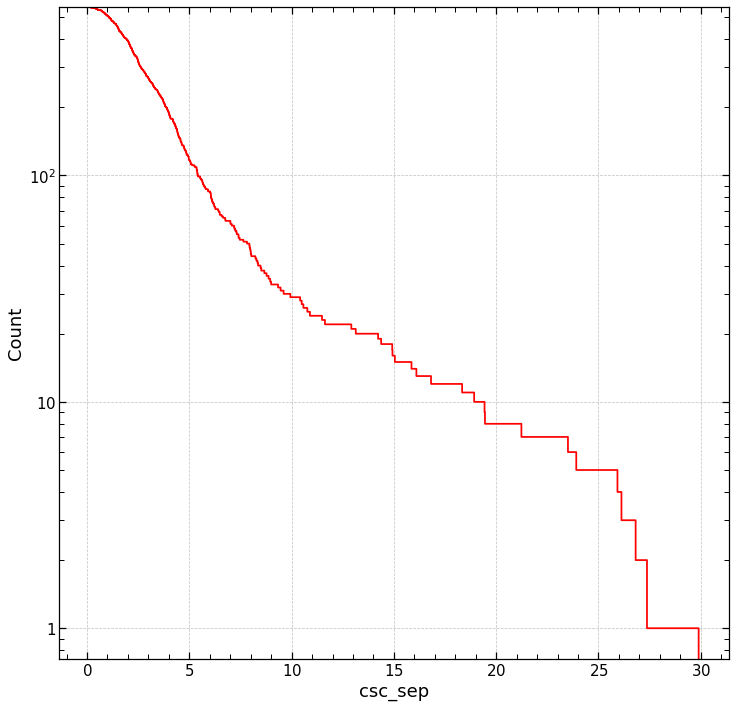

In [101]:
fig,  ax =  plt.subplots( figsize = (12,12))
sns.ecdfplot(data = ero_csc, x = 'csc_sep', complementary=True, stat='count', color='red', ax = ax)
ax.set_yscale('log')

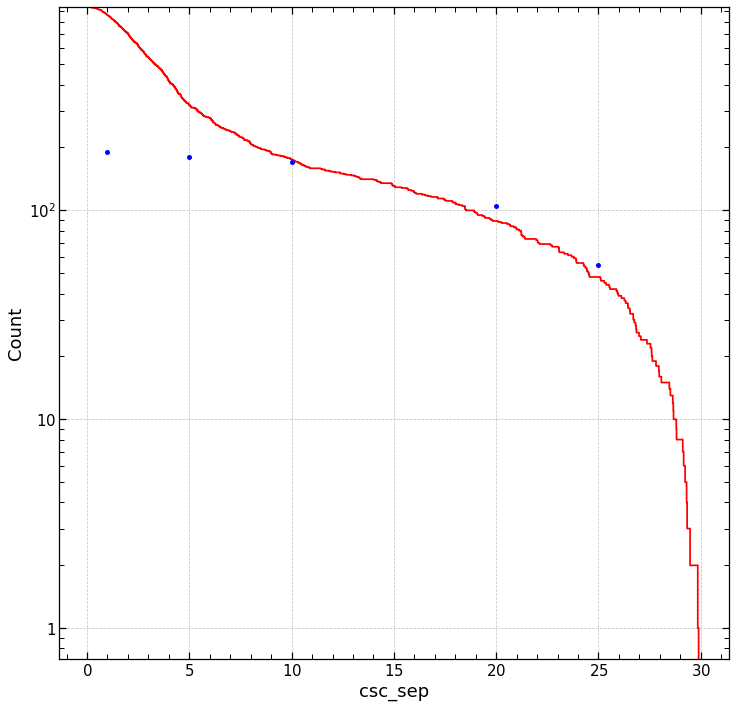

In [102]:
fig,  ax =  plt.subplots( figsize = (12,12))
sns.ecdfplot(data = ero_csc_orig, x = 'csc_sep', complementary=True, stat='count', color='red', ax = ax)
ax.set_yscale('log')\

ax.plot([20,10, 5, 1, 25], [105, 170, 180, 190, 55], 'bo')



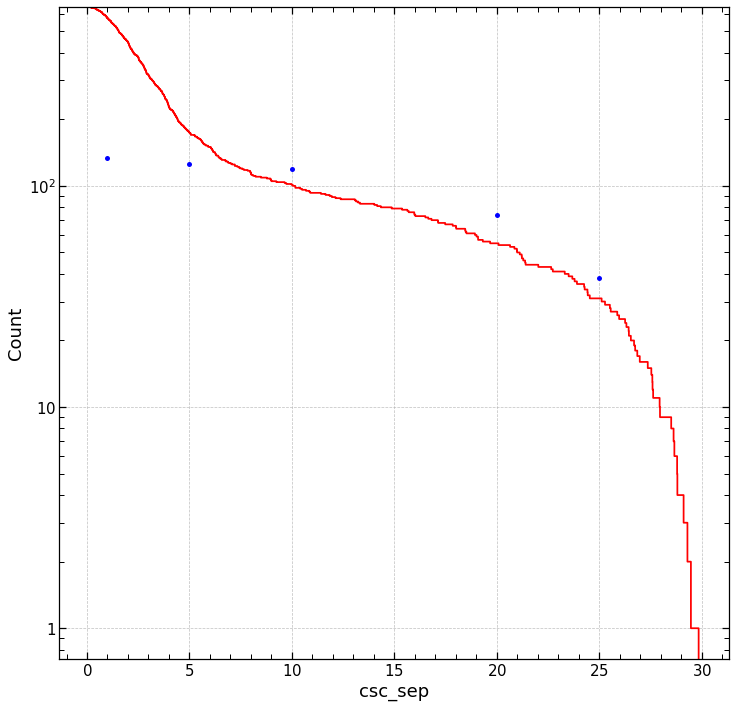

In [104]:
fig,  ax =  plt.subplots( figsize = (12,12))
sns.ecdfplot(data = ero_csc_orig.query('DET_LIKE_0>15'), x = 'csc_sep', complementary=True, stat='count', color='red', ax = ax)
ax.set_yscale('log')

ax.plot([20,10, 5, 1, 25], 0.7*np.array([105, 170, 180, 190, 55]), 'bo')


## CSC x DESI cross-match

In [71]:
csc_desi_all = cross_match_data_frames(ero_csc, desi, colname_ra1 = 'csc_ra',colname_dec1 = 'csc_dec' , colname_ra2 = 'ra', colname_dec2=  'dec', match_radius = 15, df_prefix = 'desi')
csc_desi_all

cross-match radius 15 arcsec
total matches: 2509 out of 555 x 2418574
	 total unique pairs: 2509
	 total non-unique pairs (duplicates in df2): 0


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_err_ellipse_ang,csc_significance,csc_likelihood,csc_likelihood_class,csc_conf_flag,csc_dither_warning_flag,csc_extent_flag,csc_pileup_flag,csc_sat_src_flag,csc_streak_src_flag,csc_var_flag,csc_flux_aper_s,csc_flux_aper_lolim_s,csc_flux_aper_hilim_s,csc_flux_aper_m,csc_flux_aper_lolim_m,csc_flux_aper_hilim_m,csc_radec_err,csc_r_98,csc_flux_05_2,csc_flux_05_2_err,csc_secure,csc_sep,csc_n_near,csc_n_matches,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_desi_id,desi_sep,desi_n_near,desi_n_matches
2,SRGe J110242.6+594120,165.677384,59.688978,145.179791,52.486946,7.653812,211.181183,1.846204e-13,1.864554e-14,134.683884,13.602254,666.474426,0.0,0.0,0.0,679,556,165.679392,59.687689,3.316714,224.252457,0.000026,6.268413e+08,6.270701e+08,0.0,0.0,0.202084,0.020409,3.928642,165.677384,59.688978,860692071522063104,4.485168,1,0,17.027691,-1.0,0,6C 105938+595728,1.83,BLLac,4.485268,1,1,1,1,13.617000,12.659000,9.803,43.9,47.2,27.9,1,3,1,1237658304891060264,0,3.087692,56364004534,3.316714,2.736290,4.130682,6.697745,136.878443,47.936061,1.420726e-13,6.398279e+19,2CXO J110242.8+594122,165.678600,59.689447,2.291189,2.008557,31.648612,14.313177,629.754672,TRUE,False,False,False,False,False,False,False,1.247590e-13,1.097446e-13,1.397733e-13,9.484644e-14,8.480775e-14,1.048851e-13,1.244794,3.481875,2.196054e-13,2.554235e-14,True,2.779278,1,1,9011,4152,616737,165.678178,59.688774,123.783880,140.066150,194.811190,287.176500,388.446700,1089.463000,2591.550300,53.469475,22.336110,17.090487,1.092097,0.326052,0.001556,0.000019,17.247953,17.120436,16.768284,16.353460,16.025955,14.906816,13.966043,905.142700,661.967900,805.361940,300.109280,221.806760,42.980423,11.174195,PSF,-0.023313,140.88054,-0.008907,94.32313,0.07499,50.308243,G2,860692071522063104,58194.477145,57813.360879,2018-03-17 11:27:05.369,2017-03-01 08:39:39.978,9011_616737_4152,2.540902,7,1
1,SRGe J110242.6+594120,165.677384,59.688978,145.179791,52.486946,7.653812,211.181183,1.846204e-13,1.864554e-14,134.683884,13.602254,666.474426,0.0,0.0,0.0,679,556,165.679392,59.687689,3.316714,224.252457,0.000026,6.268413e+08,6.270701e+08,0.0,0.0,0.202084,0.020409,3.928642,165.677384,59.688978,860692071522063104,4.485168,1,0,17.027691,-1.0,0,6C 105938+595728,1.83,BLLac,4.485268,1,1,1,1,13.617000,12.659000,9.803,43.9,47.2,27.9,1,3,1,1237658304891060264,0,3.087692,56364004534,3.316714,2.736290,4.130682,6.697745,136.878443,47.936061,1.420726e-13,6.398279e+19,2CXO J110242.8+594122,165.678600,59.689447,2.291189,2.008557,31.648612,14.313177,629.754672,TRUE,False,False,False,False,False,False,False,1.247590e-13,1.097446e-13,1.397733e-13,9.484644e-14,8.480775e-14,1.048851e-13,1.244794,3.481875,2.196054e-13,2.554235e-14,True,2.779278,1,1,9011,4143,616737,165.676791,59.691063,-0.015934,0.072536,0.596225,3.677433,6.544262,-131.121550,-1138.750900,749.9

In [72]:
csc_desi = csc_desi_all.query("desi_sep<=1.1*csc_r_98") #of you want only sep < r_false and the only one, replace 1.1*csc_r_98 with @r_false
#desi within 1.1*csc_r_98 and the only one
group = csc_desi.groupby('csc_name')['desi_desi_id'].count()
single_idxes = group[group == 1].index
csc_desi = csc_desi[csc_desi['csc_name'].isin(single_idxes)]


#csc_desi = csc_desi_all.query("desi_sep<=@r_false")
csc_desi = csc_desi.query("desi_sep<=@r_false")

print('cross-matches: only one desi within r_false and it is unique', csc_desi.shape[0])

 

csc_desi['csc_ero_flux_ratio'] = csc_desi['csc_flux_05_2'] / csc_desi['flux_05-20']

csc_desi.sample(5)


cross-matches: only one desi within r_false and it is unique 366


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_err_ellipse_ang,csc_significance,csc_likelihood,csc_likelihood_class,csc_conf_flag,csc_dither_warning_flag,csc_extent_flag,csc_pileup_flag,csc_sat_src_flag,csc_streak_src_flag,csc_var_flag,csc_flux_aper_s,csc_flux_aper_lolim_s,csc_flux_aper_hilim_s,csc_flux_aper_m,csc_flux_aper_lolim_m,csc_flux_aper_hilim_m,csc_radec_err,csc_r_98,csc_flux_05_2,csc_flux_05_2_err,csc_secure,csc_sep,csc_n_near,csc_n_matches,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_desi_id,desi_sep,desi_n_near,desi_n_matches,csc_ero_flux_ratio
1098,SRGe J104850.0+571006,162.208538,57.168301,150.248365,52.964389,5.917938,40.364368,9.604319e-15,1.817933e-15,43.983997,8.325417,4183.845215,0.0,0.0,0.0,3474,2764,162.210547,57.167011,2.506354,175.908646,0.000010,6.268413e+08,6.270701e+08,0.0,0.0,0.010513,0.001990,17.300806,162.208538,57.168301,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,1,0,1,16.867001,15.857,12.319,12.9,9.1,1.7,1,0,-1,0,0,NaN,65860508305,2.506354,2.115703,3.193849,5.178705,136.714807,44.832193,7.390899e-15,6.904034e+19,2CXO J104850.0+571001,162.208493,57.166948,1.118389,0.901395,44.250981,2.666667,24.990075,TRUE,False,False,False,False,False,False,False,1.788930e-14,4.293433e-15,3.148517e-14,6.173067e-15,3.086534e-15,9.097152e-15,0.586834,1.641463,2.406237e-14,1.969194e-14,True,4.868917,1,1,9011,1394,609168,162.208550,57.166924,0.496220,1.048614,1.387818,8.934950,13.730731,21.606785,633.30620,414.70712,151.86845,97.049110,4.133359,0.995247,0.001377,0.000016,23.240906,22.435051,22.136667,20.121130,19.655066,19.163376,15.495910,10.105208,12.922589,13.671881,18.165346,13.698059,0.801717,2.562443,PSF,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58194.405780,57784.444599,2018-03-17 09:44:19.410,2017-01-31 10:40:13.339,9011_609168_1394,0.142267,5,1,3.255676
1301,SRGe J104737.8+590136,161.907591,59.026681,148.157808,51.606464,7.856925,25.858677,8.000512e-15,1.747842e-15,37.572807,8.208389,4290.455078,0.0,0.0,0.0,4471,3600,161.909600,59.025391,3.410515,168.307816,0.000007,6.268413e+08,6.270701e+08,0.0,0.0,0.008757,0.001913,19.425415,161.907591,59.026681,-1,-1.000000,0,-1,NaN,-1.0,-1,CLANS 623,2.093821,QSO,5.912951,1,1,1,1,17.823000,16.704,12.651,5.2,3.9,0.2,1,1,1,1237658304890143133,9215711314261069824,5.915335,58792913765,3.410515,2.808904,4.240300,6.875486,135.088174,46.309551,6.156706e-15,8.388876e+19,2CXO J104738.0+590137,161.908712,59.027042,0.786419,0.739785,174.398141,8.698143,363.076586,TRUE,False,False,False,False,False,False,False,3.185613e-15,2.457473e-15,3.868245e-15,3.082566e-15,2.515657e-15,3.614043e-15,0.441096,1.233813,6.268179e-15,1.264922e-15,True,2.450429,1,1,9011,1912,614517,161.908750,59.026954,0.556999,0.405202,0.990158,6.745722,9.309193,6.459659,256.14740,608.27490,232.47272,112.909195,4.668561,1.134141,0.001055,0.000013,23.107357,23.461956,22.500185,20.425825,20.076735,2

***

# 4XMM DR10

In [73]:
xmm_df = pd.read_pickle(data_path+'xmm_all_lh.pkl')
xmm_df.sample(5)

,srcid,iauname,sc_ra,sc_dec,sc_poserr,sc_det_ml,sc_ep_1_flux,sc_ep_1_flux_err,sc_ep_2_flux,sc_ep_2_flux_err,sc_ep_3_flux,sc_ep_3_flux_err,sc_ep_4_flux,sc_ep_4_flux_err,sc_ep_5_flux,sc_ep_5_flux_err,sc_ep_8_flux,sc_ep_8_flux_err,sc_ep_9_flux,sc_ep_9_flux_err,sc_ep_8_fmin,sc_ep_8_fmin_err,sc_ep_8_fmax,sc_ep_8_fmax_err,sc_hr1,sc_hr1_err,sc_hr2,sc_hr2_err,sc_hr3,sc_hr3_err,sc_hr4,sc_hr4_err,sc_extent,sc_ext_err,sc_ext_ml,sc_chi2prob,sc_var_flag,sc_sum_flag,mjd_first,mjd_last,sc_fvar,sc_fvarerr,n_detections,confused,webpage_url,flux_05_2,flux_05_2_err,sigma,r_98,secure
247566,205562109010015,4XMM J103720.2+575552,159.334507,57.931281,1.785090,32.8390,1.034920e-14,4.401570e-15,1.823400e-14,5.357660e-15,1.456910e-15,2.229830e-15,1.354000e-15,4.191270e-15,0.000000e+00,3.012990e-14,3.777680e-14,3.174120e-14,3.066000e-14,8.547440e-15,3.777680e-14,3.174120e-14,3.777680e-14,3.174120e-14,0.312645,0.225795,-0.857667,0.203308,-0.239059,0.747936,-1.000000,3.339380,0.0,NaN,-0.886786,NaN,NaN,0,54619.549190,54619.630590,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20556210...,1.969091e-14,5.803160e-15,1.265892,3.540891,True
255325,201475117010179,4XMM J105246.5+573202,163.194030,57.533921,1.905420,6.5226,5.683620e-17,5.212850e-17,5.489470e-17,4.952480e-17,9.914310e-17,7.219890e-17,5.310040e-17,1.640160e-16,1.890870e-16,8.510970e-16,1.608150e-15,9.704390e-16,3.442860e-16,1.671310e-16,1.608150e-15,9.704390e-16,1.608150e-15,9.704390e-16,0.270927,0.174772,0.166488,0.250949,-0.635348,0.272935,-0.957149,0.418206,0.0,NaN,-0.473502,NaN,NaN,0,52612.199398,52613.345764,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20147511...,1.540378e-16,8.755220e-17,1.351224,3.779576,False
254204,201475101010088,4XMM J105047.0+572800,162.696054,57.466873,1.166150,42.4132,4.282190e-16,2.081200e-16,5.804560e-16,2.101880e-16,1.099690e-15,2.820490e-16,3.210500e-16,3.857110e-16,5.563240e-15,2.492930e-15,7.998430e-15,2.562910e-15,2.665140e-15,5.701760e-16,7.998430e-15,2.562910e-15,7.998430e-15,2.562910e-15,0.128386,0.254871,0.340630,0.179743,-0.557570,0.199745,0.374835,0.261182,0.0,NaN,2.214350,NaN,NaN,1,52562.275475,52563.336343,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20147510...,1.680146e-15,3.517537e-16,0.826973,2.313166,True
249655,205562112010008,4XMM J104126.5+585724,160.360776,58.956714,0.961592,103.9630,8.278040e-18,1.629280e-16,9.655610e-16,5.459780e-16,9.298720e-15,1.492570e-15,1.378000e-14,3.202940e-15,2.175930e-14,1.202420e-14,4.744920e-14,1.266440e-14,2.154870e-14,2.731410e-15,4.744920e-14,1.266440e-14,4.744920e-14,1.266440e-14,0.984635,0.265238,0.805130,0.104908,-0.305162,0.126995,-0.415046,0.234838,0.0,NaN,-1.386420,NaN,NaN,0,54595.266366,54595.352928,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20556211...,1.026428e-14,1.589295e-15,0.681911,1.907406,True
247140,202025203015025,4XMM J103558.5+562803,158.994126,56.467529,1.807070,12.7657,2.256660e-16,5.226770e-16,2.567730e-16,6.582240e-16,1.001130e-15,9.934180e-16,1.580600e-15,2.036700e-15,2.730430e-15,1.244500e-14,1.994010e-14,1.340760e-14,2.097870e-15,1.626920e-15,1.994010e-14,1.340760e-14,1.994010e-14,1.340760e-14,-0.230025,0.331311,0.393030,0.269572,-0.126636,0.387136,0.387589,0.604790,0.0,NaN,-0.644903,NaN,NaN,0,53299.251389,53299.570845,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20202520...,1.257903e-15,1.191695e-15,1.281480,3.584490,True


## XMM x eROSITA cross-match

In [74]:
ero_xmm_orig = cross_match_data_frames(ero_df, xmm_df,
 'RA_fin', 'DEC_fin', 'sc_ra', 'sc_dec', match_radius = 30, df_prefix = 'xmm')
 
ero_xmm = ero_xmm_orig.query("xmm_n_near==1 & xmm_n_matches==1")
ero_xmm = ero_xmm.query("xmm_secure==True")
print('SECURITY FILTER APPLIED (XMM)')

ero_xmm = ero_xmm.query("xmm_secure==True")
print('cross-matches: only one xmm within 30 arcsec and it is unique for the eROSITA source', ero_xmm.shape[0])
assert len(ero_xmm) == ero_xmm.xmm_srcid.nunique()
ero_xmm.sample(5)

cross-match radius 30 arcsec
total matches: 978 out of 9215 x 1791
	 total unique pairs: 944
	 total non-unique pairs (duplicates in df2): 34
SECURITY FILTER APPLIED (XMM)
cross-matches: only one xmm within 30 arcsec and it is unique for the eROSITA source 742


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,xmm_srcid,xmm_iauname,xmm_sc_ra,xmm_sc_dec,xmm_sc_poserr,xmm_sc_det_ml,xmm_sc_ep_1_flux,xmm_sc_ep_1_flux_err,xmm_sc_ep_2_flux,xmm_sc_ep_2_flux_err,xmm_sc_ep_3_flux,xmm_sc_ep_3_flux_err,xmm_sc_ep_4_flux,xmm_sc_ep_4_flux_err,xmm_sc_ep_5_flux,xmm_sc_ep_5_flux_err,xmm_sc_ep_8_flux,xmm_sc_ep_8_flux_err,xmm_sc_ep_9_flux,xmm_sc_ep_9_flux_err,xmm_sc_ep_8_fmin,xmm_sc_ep_8_fmin_err,xmm_sc_ep_8_fmax,xmm_sc_ep_8_fmax_err,xmm_sc_hr1,xmm_sc_hr1_err,xmm_sc_hr2,xmm_sc_hr2_err,xmm_sc_hr3,xmm_sc_hr3_err,xmm_sc_hr4,xmm_sc_hr4_err,xmm_sc_extent,xmm_sc_ext_err,xmm_sc_ext_ml,xmm_sc_chi2prob,xmm_sc_var_flag,xmm_sc_sum_flag,xmm_mjd_first,xmm_mjd_last,xmm_sc_fvar,xmm_sc_fvarerr,xmm_n_detections,xmm_confused,xmm_webpage_url,xmm_flux_05_2,xmm_flux_05_2_err,xmm_sigma,xmm_r_98,xmm_secure,xmm_sep,xmm_n_near,xmm_n_matches
918,SRGe J105303.5+572921,163.264410,57.489275,149.216769,53.173424,9.835257,9.016216,3.887307e-15,1.300509e-15,18.133709,6.066680,4261.724609,0.0,0.0,0.0,8677,7525,163.266419,57.487986,4.317664,75.733742,0.000007,6.268413e+08,6.270701e+08,0.0,0.0,0.004255,0.001424,22.136429,163.264410,57.489275,-1,-1.000000,0,-1,NaN,-1.0,-1,2XMM J105303.7+572924,0.78800,Seyfert_1,7.465638,1,1,1,1,16.730,15.759000,12.186,14.1,10.0,4.0,1,1,1,1237658302742790585,0,7.458997,64614339704,4.317664,3.516171,5.307984,8.606696,137.150653,45.409523,2.991434e-15,6.954677e+19,201237001010020,4XMM J105303.7+572924,163.265770,57.490055,0.166222,536.8840,1.110010e-15,6.442200e-17,1.826730e-15,7.760630e-17,2.813450e-15,9.899130e-17,4.536680e-15,2.280410e-16,3.233530e-15,5.878480e-16,1.674390e-14,6.974280e-16,9.574000e-15,2.200480e-16,1.087200e-14,6.363330e-15,3.416750e-14,4.374240e-15,0.156070,0.026883,0.129578,0.022821,-0.317656,0.025160,-0.643624,0.039348,0.0,NaN,-0.688860,0.011239,False,1,51661.149132,52615.192419,0.660185,0.210014,17,False,http://xmm-catalog.irap.omp.eu/source/20123700...,4.640180e-15,1.257856e-16,0.117876,0.329717,True,3.845457,1,1
243,SRGe J103426.5+601055,158.610301,60.181945,148.506912,49.589688,10.920171,13.233225,1.753125e-14,5.402529e-15,18.027266,5.555386,939.430359,0.0,0.0,0.0,7129,6011,158.612310,60.180655,4.811704,83.560829,0.000019,6.268413e+08,6.270701e+08,0.0,0.0,0.019190,0.005914,6.328879,158.610301,60.181945,1047948312004823296,1.822583,1,0,20.005226,-1.0,0,2XMM J103427.0+601051,0.81100,QSO,1.827984,1,1,0,1,15.587,14.722000,11.755,27.3,20.3,4.8,1,1,1,1237655370356228256,7981741221239607296,1.782922,54586666434,4.811704,3.904035,5.893501,9.556089,132.150589,46.375616,1.349098e-14,7.440836e+19,203060507010003,4XMM J103427.1+601052,158.612988,60.181133,0.646021,689.9760,1.966660e-14,1.985350e-15,1.707110e-14,1.915030e-15,1.772300e-14,2.147390e-15,2.202420e-14,4.107910e-15,3.397120e-14,1.719560e-14,1.118230e-13,1.822420e-14,6.368340e-14,4.714780e-15,1.118230e-13,1.822420e-14,1.118230e-13,1.822420e-14,-0.025472,0.072071,-0.065632,0.076124,-0.406242,0.092745,-0.322147,0.199007,0.0,NaN,-2.241700,0.320445,False,0,53464.316447,53464.431447,0.117673,0.207228,1,False,http://xmm-catalog.irap.omp.eu/source/20306050...,3.479410e-14,2.877260e-15,0.458124,1.281442,True,5.627130,1,1
732,SRGe J105305.6+573426,163.273145,57.573895,149.108070,53.119275,7.921021,15.663671,5.854812e-15,1.646828e-15,27.581669,7.758106,4303.829590,0.0,0.0,0.0,7172,6050,163.275153,57.572605,3.440084,122.975891,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.006409,0.001803,43.593739,163.273145,57.573895,854199558439590144,3.210997,1,0,20.351524,-1.0,0,3XMM J105306.0+

## XMM x DESI cross-match

In [75]:
xmm_desi_all = cross_match_data_frames(ero_xmm, desi, colname_ra1 = 'xmm_sc_ra',colname_dec1 = 'xmm_sc_dec' , colname_ra2 = 'ra', colname_dec2=  'dec', match_radius = 15, df_prefix = 'desi')
xmm_desi_all

cross-match radius 15 arcsec
total matches: 3293 out of 742 x 2418574
	 total unique pairs: 3293
	 total non-unique pairs (duplicates in df2): 0


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,xmm_srcid,xmm_iauname,xmm_sc_ra,xmm_sc_dec,xmm_sc_poserr,xmm_sc_det_ml,xmm_sc_ep_1_flux,xmm_sc_ep_1_flux_err,xmm_sc_ep_2_flux,xmm_sc_ep_2_flux_err,xmm_sc_ep_3_flux,xmm_sc_ep_3_flux_err,xmm_sc_ep_4_flux,xmm_sc_ep_4_flux_err,xmm_sc_ep_5_flux,xmm_sc_ep_5_flux_err,xmm_sc_ep_8_flux,xmm_sc_ep_8_flux_err,xmm_sc_ep_9_flux,xmm_sc_ep_9_flux_err,xmm_sc_ep_8_fmin,xmm_sc_ep_8_fmin_err,xmm_sc_ep_8_fmax,xmm_sc_ep_8_fmax_err,xmm_sc_hr1,xmm_sc_hr1_err,xmm_sc_hr2,xmm_sc_hr2_err,xmm_sc_hr3,xmm_sc_hr3_err,xmm_sc_hr4,xmm_sc_hr4_err,xmm_sc_extent,xmm_sc_ext_err,xmm_sc_ext_ml,xmm_sc_chi2prob,xmm_sc_var_flag,xmm_sc_sum_flag,xmm_mjd_first,xmm_mjd_last,xmm_sc_fvar,xmm_sc_fvarerr,xmm_n_detections,xmm_confused,xmm_webpage_url,xmm_flux_05_2,xmm_flux_05_2_err,xmm_sigma,xmm_r_98,xmm_secure,xmm_sep,xmm_n_near,xmm_n_matches,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_desi_id,desi_sep,desi_n_near,desi_n_matches
5,SRGe J104117.7+584929,160.323629,58.824642,149.266632,51.126914,2.166339,3391.888916,2.361506e-13,7.471780e-15,1120.011108,35.437035,4332.920898,0.0,0.0,0.0,38,27,160.325638,58.823353,0.454968,97.643723,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.258489,0.008179,18.102430,160.323629,58.824642,-1,-1.0,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,1,1,0,15.243,15.129000,12.821,31.5,15.9,-0.2,1,3,0,1237658304889815429,0,2.181367,59543516327,0.454968,0.774481,1.169150,1.895733,134.256532,45.696772,1.817271e-13,7.704875e+19,205562112010003,4XMM J104117.9+584929,160.324685,58.824762,0.817968,742.5780,2.808530e-14,3.382310e-15,4.008580e-14,4.210150e-15,4.761820e-14,4.978040e-15,5.426170e-14,9.520310e-15,8.843220e-15,2.233210e-14,1.909300e-13,2.733320e-14,1.567980e-13,1.062820e-14,1.909300e-13,2.733320e-14,1.909300e-13,2.733320e-14,0.136026,0.075853,0.023020,0.072849,-0.437121,0.081245,-0.896701,0.157718,0.0,NaN,-2.276850,0.425014,False,0,54595.266366,54595.352928,0.012697,1.426367,1,False,http://xmm-catalog.irap.omp.eu/source/20556211...,8.770400e-14,6.519681e-15,0.580060,1.622515,True,2.015272,1,1,9011,43,613766,160.324219,58.824639,-0.052349,0.298325,1.900912,2.352417,2.387243,53.370483,2019.365800,671.00964,212.87097,70.456120,2.689567,0.915560,0.001440,0.000018,NaN,23.799402,21.794834,21.570036,21.554535,18.181593,14.236904,-1.356040,4.352592,15.955904,3.857940,2.284231,2.025409,8.467377,PSF,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58194.398524,57851.315637,2018-03-17 09:33:52.450,2017-04-08 07:34:31,9011_613766_43,0.975167,9,1
6,SRGe J104117.7+584929,160.323629,58.824642,149.266632,51.126914,2.166339,3391.888916,2.361506e-13,7.471780e-15,1120.011108,35.437035,4332.920898,0.0,0.0,0.0,38,27,160.325638,58.823353,0.454968,97.643723,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.258489,0.008179,18.102430,160.323629,58.824642,-1,-1.0,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,1,1,0,15.243,15.129000,12.821,31.5,15.9,-0.2,1,3,0,1237658304889815429,0,2.181367,59543516327,0.4549

In [76]:
xmm_desi = xmm_desi_all.query("desi_sep<=1.1*xmm_r_98") #of you want only sep < r_false and the only one, replace 1.1*xmm_r_98 with @r_false
#desi within 1.1*xmm_r_98 and the only one
group = xmm_desi.groupby('xmm_srcid')['desi_desi_id'].count()
single_idxes = group[group == 1].index
xmm_desi = xmm_desi[xmm_desi['xmm_srcid'].isin(single_idxes)]


#xmm_desi = xmm_desi_all.query("desi_sep<=@r_false")
xmm_desi = xmm_desi.query("desi_sep<=@r_false")

print('cross-matches: only one desi within r_false and it is unique', xmm_desi.shape[0])

 

xmm_desi['xmm_ero_flux_ratio'] = xmm_desi['xmm_flux_05_2'] / xmm_desi['flux_05-20']

xmm_desi.sample(5)


cross-matches: only one desi within r_false and it is unique 418


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,xmm_srcid,xmm_iauname,xmm_sc_ra,xmm_sc_dec,xmm_sc_poserr,xmm_sc_det_ml,xmm_sc_ep_1_flux,xmm_sc_ep_1_flux_err,xmm_sc_ep_2_flux,xmm_sc_ep_2_flux_err,xmm_sc_ep_3_flux,xmm_sc_ep_3_flux_err,xmm_sc_ep_4_flux,xmm_sc_ep_4_flux_err,xmm_sc_ep_5_flux,xmm_sc_ep_5_flux_err,xmm_sc_ep_8_flux,xmm_sc_ep_8_flux_err,xmm_sc_ep_9_flux,xmm_sc_ep_9_flux_err,xmm_sc_ep_8_fmin,xmm_sc_ep_8_fmin_err,xmm_sc_ep_8_fmax,xmm_sc_ep_8_fmax_err,xmm_sc_hr1,xmm_sc_hr1_err,xmm_sc_hr2,xmm_sc_hr2_err,xmm_sc_hr3,xmm_sc_hr3_err,xmm_sc_hr4,xmm_sc_hr4_err,xmm_sc_extent,xmm_sc_ext_err,xmm_sc_ext_ml,xmm_sc_chi2prob,xmm_sc_var_flag,xmm_sc_sum_flag,xmm_mjd_first,xmm_mjd_last,xmm_sc_fvar,xmm_sc_fvarerr,xmm_n_detections,xmm_confused,xmm_webpage_url,xmm_flux_05_2,xmm_flux_05_2_err,xmm_sigma,xmm_r_98,xmm_secure,xmm_sep,xmm_n_near,xmm_n_matches,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_desi_id,desi_sep,desi_n_near,desi_n_matches,xmm_ero_flux_ratio
1038,SRGe J104919.0+584238,162.329035,58.710686,148.294925,51.980808,4.411793,84.874046,1.536555e-14,2.192420e-15,72.975143,10.412392,4338.846680,0.0,0.0,0.0,2083,1634,162.331044,58.709396,1.779204,61.225376,0.000010,6.268413e+08,6.270701e+08,0.0,0.0,0.016819,0.002400,17.193510,162.329035,58.710686,-1,-1.000000,0,-1,NaN,-1.0,-1,2XMM J104918.6+584237,0.581358,QSO,6.872956,1,1,0,0,15.780,15.456,11.649,25.0,11.4,5.4,1,1,0,1237658304353337645,0,6.877641,59969429842,1.779204,1.577246,2.380998,3.860699,135.601856,46.164336,1.182439e-14,8.384237e+19,203033603010009,4XMM J104918.7+584237,162.328004,58.710525,0.862242,183.1360,2.707190e-15,5.280780e-16,5.254180e-15,7.313910e-16,4.166630e-15,7.905870e-16,2.550660e-15,1.253140e-15,1.406920e-14,7.985190e-15,3.168110e-14,8.292170e-15,1.335700e-14,1.569700e-15,3.168110e-14,8.292170e-15,3.168110e-14,8.292170e-15,0.275052,0.108149,-0.180347,0.109853,-0.521811,0.149136,0.432289,0.254165,0.0,NaN,-1.629750,NaN,NaN,0,53653.701968,53654.009491,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20303360...,9.420810e-15,1.077015e-15,0.611457,1.710337,True,2.013235,1,1,9011,614,613770,162.327988,58.710475,2.692810,5.662831,12.483377,43.599970,30.154509,223.07256,170.49315,376.815900,100.585050,68.439260,3.068326,0.922265,0.001205,0.000015,21.396183,20.598350,19.748505,18.399664,18.800625,16.628672,16.920652,52.272144,56.793724,103.272514,76.372500,28.958769,7.742685,0.670878,REX,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,NaN,0,58194.402846,57837.291395,2018-03-17 09:40:05.868,2017-03-25 06:59:36.530,9011_613770_614,0.182559,3,1,0.796727
2860,SRGe J105545.0+573103,163.937381,57.517519,148.767516,53.417183,7.228389,11.951623,4.427510e-15,1.326163e-15,19.587626,5.867041,4041.752441,0.0,0.0,0.0,7126,6008,163.939390,57.516229,3.119689,80.804504,0.000011,6.268413e+08,6.270701e+08,0.0,0.0,0.004846,0.001452,15.206818,163.937381,57.517519,-1,-1.000000,0,-1,NaN,-1.0,-1,GALEX J105545.2+573109,NaN,UV,10.7

# Joining CSC and XMM counterparts

In [77]:
csc_ctps = csc_desi[['srcname_fin', 'RA_fin','DEC_fin', 'DET_LIKE_0', 'pos_r98', 'pos_sigma_2d', 'flux_05-20', 'csc_sep', 'csc_name',   'csc_ra', 'csc_dec', 'csc_flux_05_2', 'csc_r_98', 'desi_sep', 'desi_desi_id',  'desi_ra', 'desi_dec', 'csc_ero_flux_ratio']]

xmm_ctps = xmm_desi[['srcname_fin', 'RA_fin','DEC_fin', 'DET_LIKE_0', 'pos_r98', 'pos_sigma_2d', 'flux_05-20', 'xmm_sep', 'xmm_srcid',   'xmm_sc_ra', 'xmm_sc_dec', 'xmm_flux_05_2', 'xmm_r_98', 'desi_sep', 'desi_desi_id',  'desi_ra', 'desi_dec', 'xmm_ero_flux_ratio']]

csc_ctps.rename(columns = {'desi_desi_id':'desi_id'}, inplace = True)
xmm_ctps.rename(columns = {'desi_desi_id':'desi_id'}, inplace = True)

In [78]:
print('XMM companions', xmm_ctps.shape[0])
print('CSC companions', csc_ctps.shape[0])
print('Total companions possible', xmm_ctps.shape[0] + csc_ctps.shape[0])

XMM companions 418
CSC companions 366
Total companions possible 784


In [79]:
xmm_ctps = xmm_ctps[xmm_ctps['xmm_ero_flux_ratio'] <  5 ]
xmm_ctps = xmm_ctps[xmm_ctps['xmm_ero_flux_ratio'] >  1/5 ]

csc_ctps = csc_ctps[csc_ctps['csc_ero_flux_ratio'] <  5 ]
csc_ctps = csc_ctps[csc_ctps['csc_ero_flux_ratio'] >  1/5 ]

In [80]:
xmm_ctps = xmm_ctps[['srcname_fin', 'RA_fin', 'DEC_fin', 'pos_sigma_2d', 'flux_05-20', 'DET_LIKE_0', 'desi_id', 'desi_ra', 'desi_dec']]
csc_ctps = csc_ctps[['srcname_fin', 'RA_fin', 'DEC_fin', 'pos_sigma_2d', 'flux_05-20', 'DET_LIKE_0','desi_id', 'desi_ra', 'desi_dec']]
xmm_ctps['x_ray_det'] = 'xmm'
csc_ctps['x_ray_det'] = 'csc'
print('After Flux filter')
print('XMM companions', xmm_ctps.shape[0])
print('CSC companions', csc_ctps.shape[0])
print('Total companions possible', xmm_ctps.shape[0] + csc_ctps.shape[0])

After Flux filter
XMM companions 409
CSC companions 269
Total companions possible 678


In [81]:
final_ctps = pd.concat([xmm_ctps, csc_ctps])
#final_ctps = pd.concat([csc_ctps])
#final_ctps = pd.concat([xmm_ctps])
final_ctps.sort_values(by='srcname_fin', inplace=True)
final_ctps.reset_index(drop=True, inplace=True)


n_ctps = final_ctps.groupby('srcname_fin')['x_ray_det'].transform(lambda x: len(x.unique())) 
final_ctps['n_x_ray_det'] = n_ctps

n_desi_ctps = final_ctps.groupby('srcname_fin')['desi_id'].transform(lambda x: len(x.unique()))
final_ctps['n_desi_ctps'] = n_desi_ctps


final_ctps = final_ctps.query('( n_x_ray_det == 1 ) | ( n_x_ray_det==2 & n_desi_ctps == 1 )')
## final_ctps.query('( n_x_ray_det == 1 ) | ( n_x_ray_det==2 & n_desi_ctps == 1 )') - opposite of this


final_ctps.drop_duplicates(subset=['srcname_fin', 'desi_id'], inplace=True)


final_ctps = add_separation_columns(final_ctps, colname_ra1 = 'RA_fin', colname_dec1 = 'DEC_fin', colname_ra2 = 'desi_ra', colname_dec2 = 'desi_dec', colname = 'sep_ero_desi')



#SRGe J105817.5+564621 is in the galaxy cluster -> should be deleted, sep/err = 3.6
#SRGe J105322.7+571514 second source within r98 of csc -> it is an 'xmm' detection, which is out of frame. Chandra detection is much closer to the erosita, but fails the condition of being the only one DESI within r98. -> should be deleted, sep/err = 7.963218
#SRGe J103426.1+575524 - two different ctps in csc and xmm - two CSC nearby, and only one XMM nearby, unclear what is a real detection, sep/err = 5.046855

drop_srcids = ['SRGe J105817.5+564621', 'SRGe J105322.7+571514', 'SRGe J103426.1+575524']






# #save final_ctps_csv to csv
final_ctps_csv = final_ctps[['srcname_fin', 'desi_id']]
final_ctps_csv.rename(columns={'desi_id':'desi_id_true'}, inplace=True)
final_ctps_csv.to_csv(data_path+'validation_ctps_ero_desi_lh_no_hostless.csv', index=False)
print('len when sep/err > 3 ', final_ctps.query('sep_ero_desi/pos_sigma_2d>3').shape[0])

final_ctps

len when sep/err > 3  17


,srcname_fin,RA_fin,DEC_fin,pos_sigma_2d,flux_05-20,DET_LIKE_0,desi_id,desi_ra,desi_dec,x_ray_det,n_x_ray_det,n_desi_ctps,sep_ero_desi
0,SRGe J103105.9+573747,157.774385,57.629820,2.927322,3.362480e-15,10.766065,9011_610714_1440,157.774282,57.630173,csc,1,1,1.288998
1,SRGe J103123.8+574309,157.849052,57.719110,1.194977,2.582066e-14,241.302124,9011_610714_2092,157.848257,57.719498,csc,1,1,2.070640
2,SRGe J103130.8+573932,157.878489,57.658958,3.460543,4.648196e-15,16.483074,9011_610714_2412,157.880032,57.659682,csc,1,1,3.952662
3,SRGe J103137.0+573159,157.904134,57.532955,2.291806,7.812335e-15,37.274281,9011_609939_1093,157.904358,57.533253,csc,1,1,1.154828
4,SRGe J103143.5+573156,157.931232,57.532161,2.144571,1.160345e-14,61.354324,9011_609939_1343,157.930621,57.532696,csc,1,1,2.261288
...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,SRGe J110614.9+585347,166.562283,58.896277,2.956780,6.742923e-15,11.506282,9011_614527_601,166.560542,58.897072,csc,1,1,4.321613
674,SRGe J110633.0+590313,166.637537,59.053617,7.192980,1.009282e-14,8.283731,9011_614527_1198,166.637299,59.052750,csc,1,1,3.150115
675,SRGe J110645.0+590331,166.687525,59.058674,5.037064,7.184641e-15,6.913430,9011_614527_1596,166.687325,59.058440,csc,1,1,0.920125
676,SRGe J110648.4+585514,166.701535,58.920668,3.815435,7.916981e-15,8.045092,9011_614527_1704,166.701968,58.921308,csc,1,1,2.442214


In [82]:
final_ctps.query('sep_ero_desi/pos_sigma_2d>3')[['srcname_fin', 'DET_LIKE_0', 'sep_ero_desi', 'pos_sigma_2d', 'flux_05-20']]

,srcname_fin,DET_LIKE_0,sep_ero_desi,pos_sigma_2d,flux_05-20
69,SRGe J103343.6+601006,12.330071,24.064839,4.186226,1.918748e-14
84,SRGe J103359.9+573932,12.672739,9.099030,2.821083,3.349891e-15
112,SRGe J103426.1+575524,12.995943,17.057492,3.379826,4.522083e-15
207,SRGe J104045.8+575533,32.170189,7.065404,2.049778,8.117203e-15
295,SRGe J104431.8+593242,10.943856,15.026015,3.062456,3.594552e-15
304,SRGe J104447.4+590632,44.850346,7.852767,2.438828,8.892620e-15
342,SRGe J104556.7+573140,30.282082,8.107576,2.351479,7.293657e-15
377,SRGe J104651.0+585524,8.445416,13.412517,4.162538,3.240818e-15
450,SRGe J104858.5+590824,7.146227,15.241038,3.726686,3.091001e-15
486,SRGe J104935.1+583825,7.273622,26.142412,5.195169,3.039346e-15


(1, 10000.0)

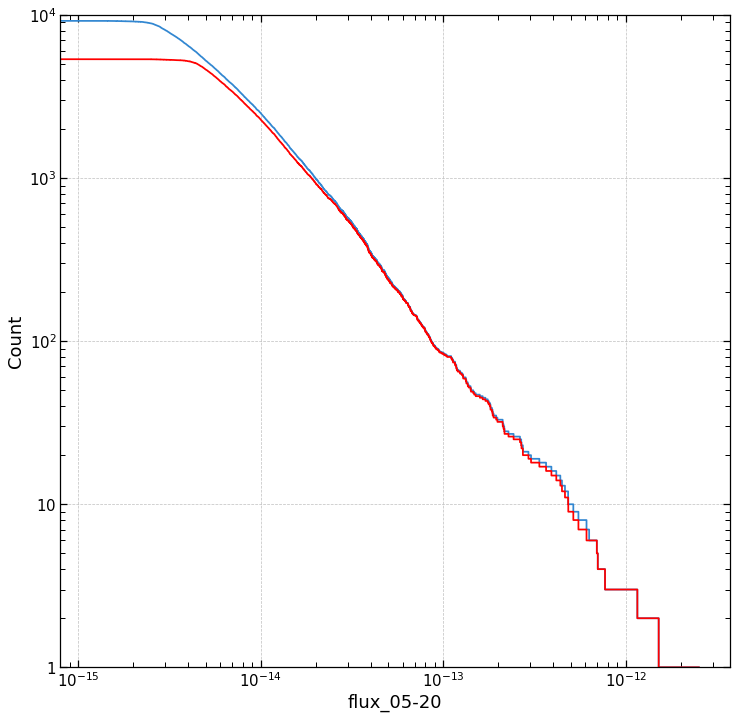

In [131]:
fig,  ax =  plt.subplots( figsize = (12,12))
sns.ecdfplot(ero_df.query("DET_LIKE_0>6")['flux_05-20'], log_scale=True, complementary=True, label='ero_csc_orig', stat='count', ax=ax)

sns.ecdfplot(ero_df.query("DET_LIKE_0>15")['flux_05-20'], log_scale=True, complementary=True, label='ero_csc_orig', stat='count', ax=ax, color = 'r')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1, 1e4)

(1, 10000.0)

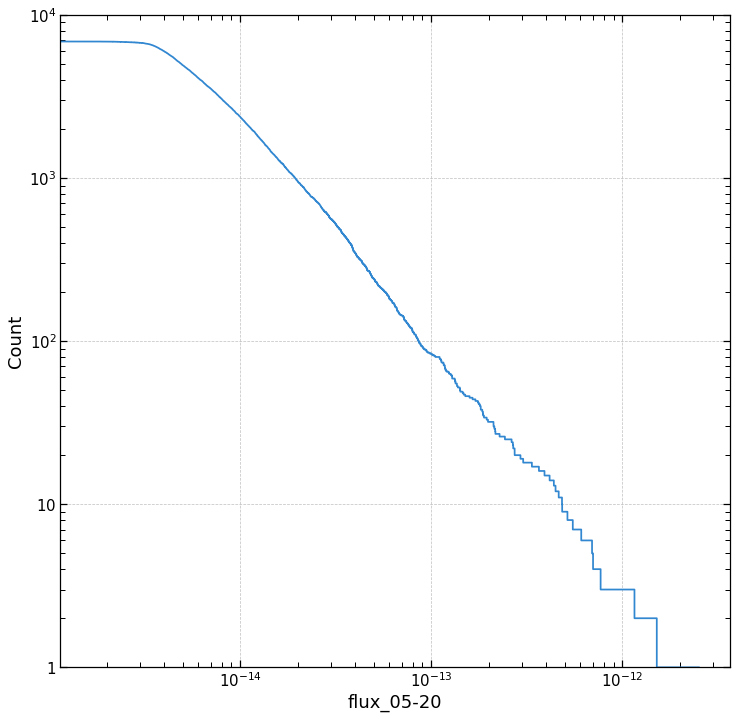

In [128]:
fig,  ax =  plt.subplots( figsize = (12,12))
sns.ecdfplot(ero_df.query("DET_LIKE_0>10")['flux_05-20'], log_scale=True, complementary=True, label='ero_csc_orig', stat='count', ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1, 1e4)


In [115]:
len(ero_csc_orig.query("DET_LIKE_0>10"))/len(ero_csc_orig)

0.8257173219978746

In [111]:
600*0.02 #sep/sigma > 3 ~ sep/pos_r98~1

12.0

In [110]:
1/0.35

2.857142857142857

In [108]:
ero_df['pos_sigma_2d']/ero_df['pos_r98']

0       0.357507
1       0.357507
2       0.357507
3       0.357507
4       0.357507
          ...   
9210    0.357507
9211    0.357507
9212    0.357507
9213    0.357507
9214    0.357507
Length: 9215, dtype: float32

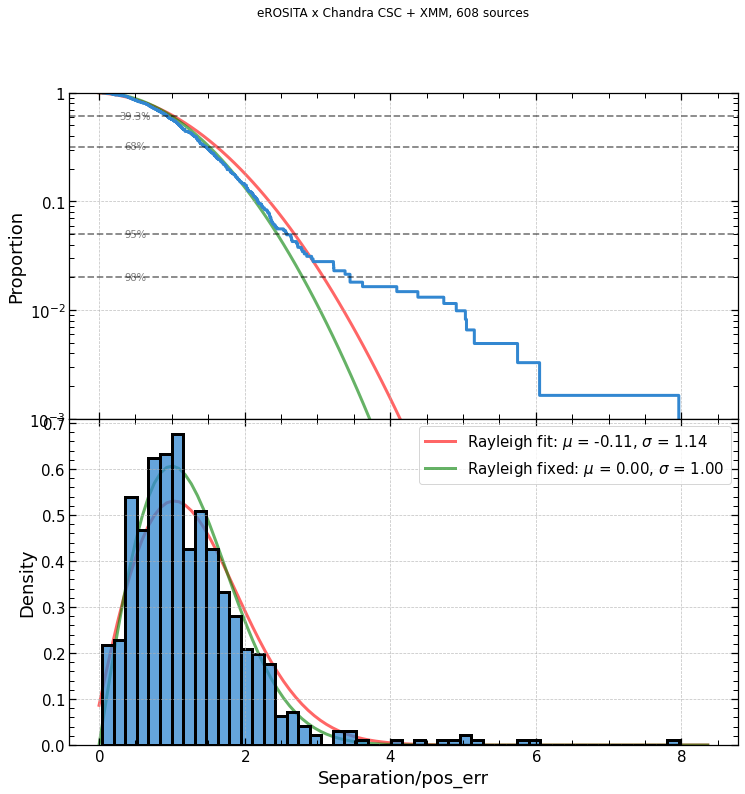

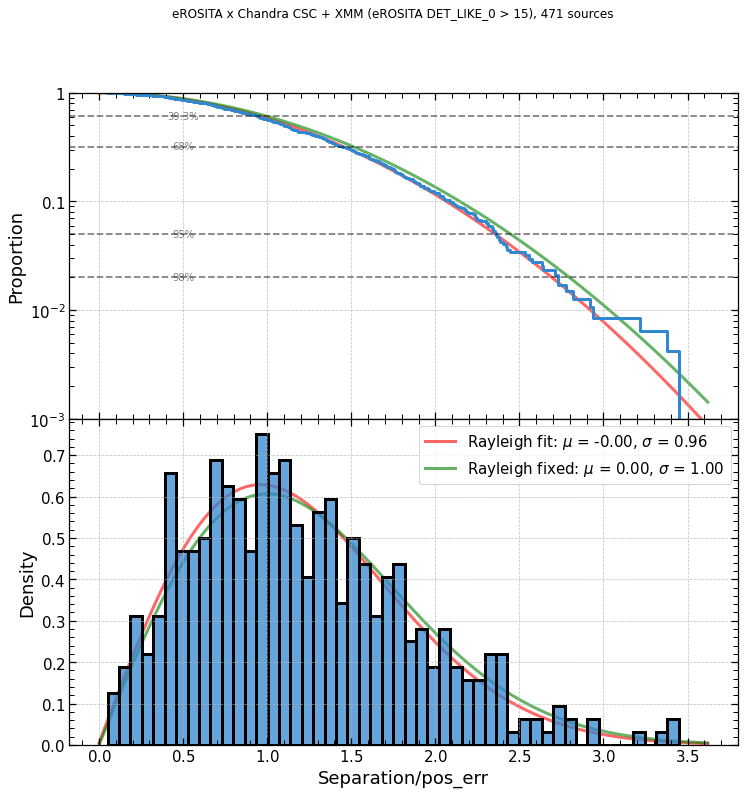

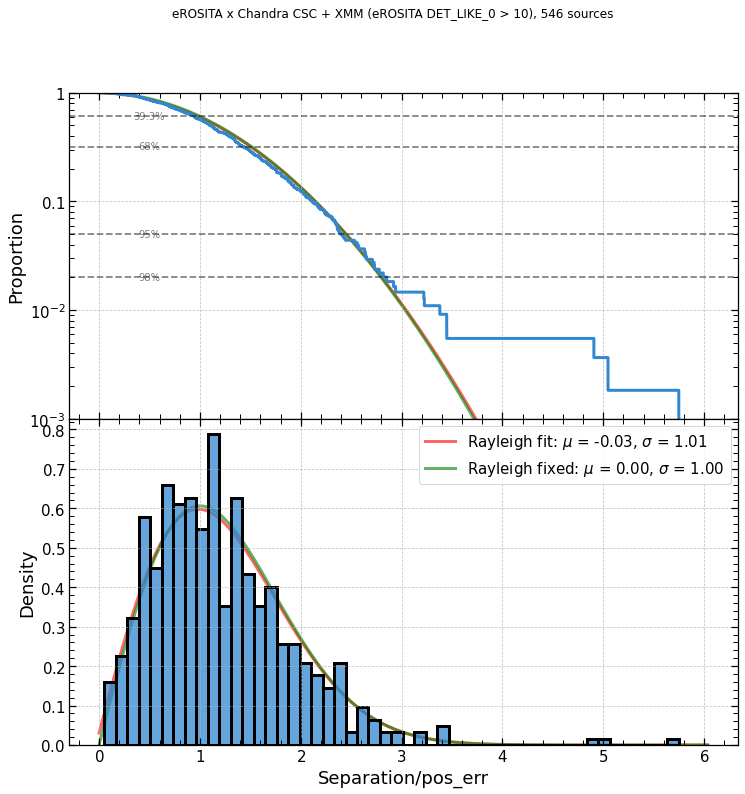

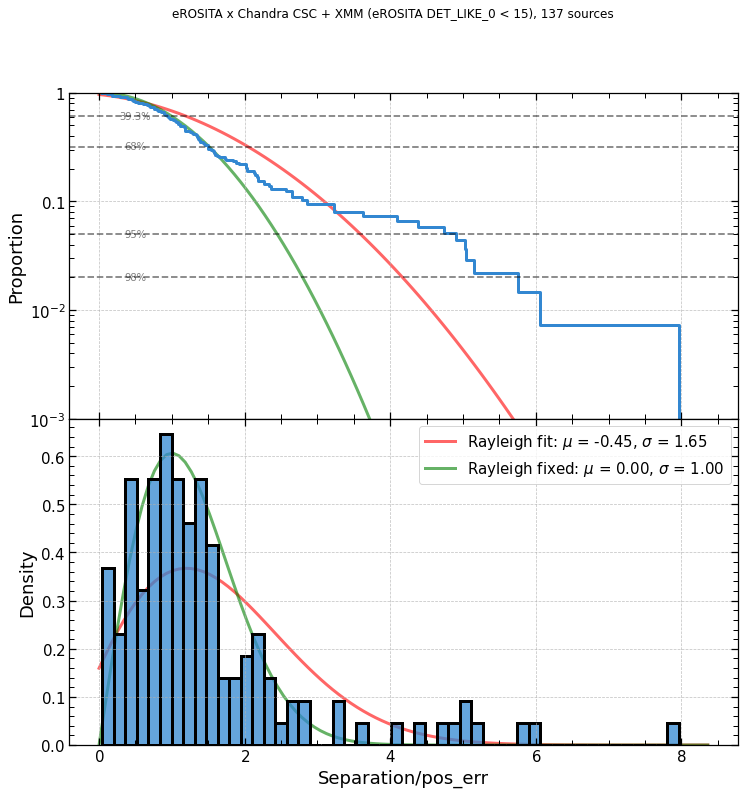

In [105]:
from scripts.cross_match_scripts import rayleigh_plot
rayleigh_plot(final_ctps, sep_col='sep_ero_desi', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x Chandra CSC + XMM')
rayleigh_plot(final_ctps.query('DET_LIKE_0>15'), sep_col='sep_ero_desi', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x Chandra CSC + XMM (eROSITA DET_LIKE_0 > 15)')

rayleigh_plot(final_ctps.query('DET_LIKE_0>10'), sep_col='sep_ero_desi', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x Chandra CSC + XMM (eROSITA DET_LIKE_0 > 10)')


rayleigh_plot(final_ctps.query('DET_LIKE_0<15'), sep_col='sep_ero_desi', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x Chandra CSC + XMM (eROSITA DET_LIKE_0 < 15)')



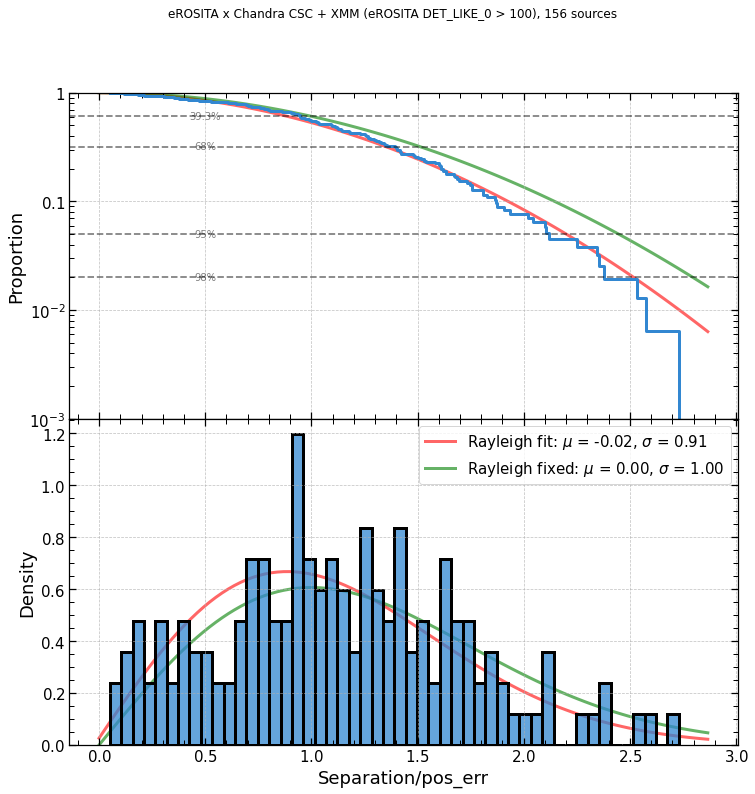

In [84]:
rayleigh_plot(final_ctps.query('DET_LIKE_0>100'), sep_col='sep_ero_desi', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x Chandra CSC + XMM (eROSITA DET_LIKE_0 > 100)')



## distribution over separations

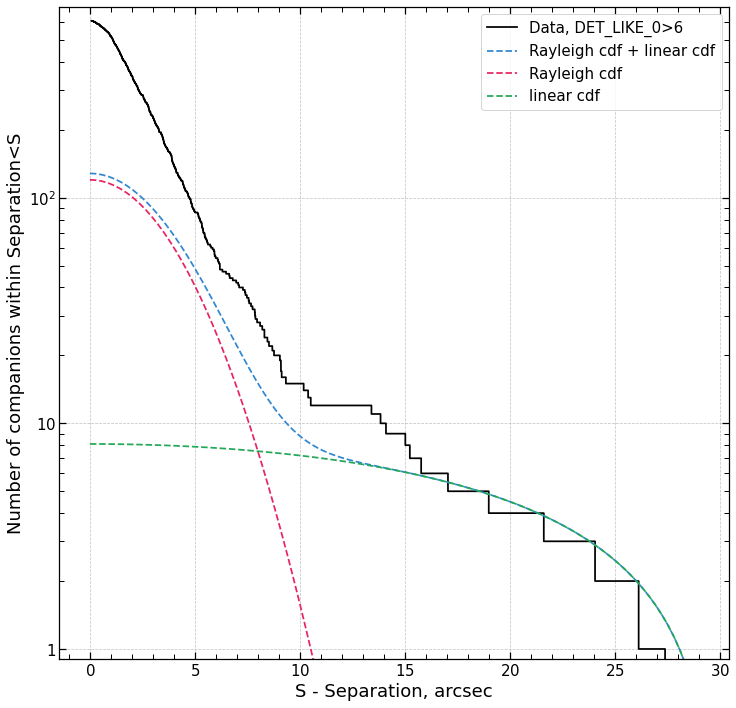

In [87]:
%matplotlib inline
query = 'DET_LIKE_0>6'
seps = final_ctps.query(query)['sep_ero_desi']
sep_bins = np.linspace(0, 30, 300)

sep_hist, bin_edges = np.histogram(seps, bins=sep_bins)
sep_hist = np.cumsum(sep_hist)
hist_area = sep_hist
sep_axis = (bin_edges[1:] + bin_edges[:-1])/2
fig,  ax =  plt.subplots( figsize = (12,12))

#ax.bar(sep_axis, hist_area, width = 1, alpha = 0.4)
sns.ecdfplot(seps, color='k', ax = ax, stat='count', log_scale=False, label = 'Data, '+query , complementary=True)
ax.set_xlabel('S - Separation, arcsec')
ax.set_ylabel('Number of companions within Separation<S')


from scipy.optimize import curve_fit
from scipy import stats
def gaus_cdf(x,N,sep0,sep_sigma):
    #return N*stats.norm.cdf(x, loc=sep0, scale=sep_sigma)
    return N*(1-stats.rayleigh.cdf(x, loc=sep0, scale=sep_sigma))

def linear_cdf(x,a):
    #b = -60*a
    #return a*x**2+b*x
    #return a*x**2
    return a *(30**2-x**2)

def model_cdf(x, N, sep0, sep_sigma, a):
    return gaus_cdf(x,N,sep0,sep_sigma)  + linear_cdf(x,a)

#popt, pcov = curve_fit(model_cdf, sep_axis, hist_area, p0=[1, 1, 2,  0])
#print(popt)
popt = [120, 0,  3.4, 0.9e-2]
x = np.linspace(0, 29, 100)
ax.plot(x, model_cdf(x, *popt), 'C0--', label = 'Rayleigh cdf + linear cdf')
ax.plot(x, gaus_cdf(x, *popt[:3]), 'C1--', label = 'Rayleigh cdf')
ax.plot(x, linear_cdf(x, *popt[3:]), 'C2--', label = 'linear cdf')
ax.legend()
#n_false  =linear_cdf(30, *popt[3:])
#ax.axhline(n_false, color='g', linestyle=':')
#ax.text(10, n_false+n_false/2, 'Number of false companions = {:.0f}'.format(n_false),  va='top', ha='left', fontsize = 19)

#print('Number of false companions', n_false)
ax.set_yscale('log')
ax.set_ylim(0.9, 700)
plt.show()
